# Labelling Recipes Stage
**Sharon Marfatia**

In [46]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [47]:
fifty_cutoff = 191.12
# is the overall baseline supposed to be the GHG_baseline?
overall_baseline = 382.25

GHG_baseline = 382.25
nitrogen_baseline = 3.86
water_baseline = 1248.19
land_baseline = 0.93

In [48]:
# CHANGE THIS AS NEEDED:
restaurant_name = "OK23-24"
# restaurant_name = "Gather23-24"
# restaurant_name = "Totem23-24"

In [4]:
def create_ghg_label(label):
    # determine the GHG label based on the given label value and predefined cutoffs
    if label > overall_baseline:
        # if the label value is > than overall baseline, assign "Red" label
        return "Red"
    elif (label <= overall_baseline) & (label > fifty_cutoff):
        # if the label value is between overall baseline and fifty_cutoff, assign "Yellow" label
        return "Yellow"
    elif label <= fifty_cutoff:
        # if the label value is less than or equal to the fifty_cutoff, assign "Green" label
        return "Green"


In [5]:
def create_results_all_factors(df):
    # create a Combined Label based on different factors for each row in the DataFrame
    df["Combined Label"] = ""

    # add another parameter: n so that change the number of factors instead of multiplying by 3

    def calculate_all_factors(ghg, nitrogen, water, land):
        # calculate the combined label value based on the given factors
        weighted_ghg = ghg / (4 * GHG_baseline)
        weighted_nitrogen = nitrogen / (4 * nitrogen_baseline)
        weighted_water = water / (4 * water_baseline)

        # most recently added
        weighted_land = land / (4 * land_baseline)

        return weighted_ghg + weighted_nitrogen + weighted_water + weighted_land


    for ind, row in df.iterrows():
        # iterate over each row in the DataFrame and calculate the combined label
        label = calculate_all_factors(row["GHG Emission (g) / 100g"], row["N lost (g) / 100g"],
                                      row["Stress-Weighted Water Use (L) / 100g"],
                                      row['Land Use (m^2) / 100g'])

        if label <= 0.5:
            # if the label value is less than or equal to 0.5, assign "Green" label
            df.loc[ind, "Combined Label"] = "Green"
        elif label >= 1:
            # if the label value is greater than or equal to 1, assign "Red" label
            df.loc[ind, "Combined Label"] = "Red"
        elif (label > 0.5) or (label < 1):
            # if the label value is between 0.5 and 1, assign "Yellow" label
            df.loc[ind, "Combined Label"] = "Yellow"
    return df


In [6]:
def add_menu_names(df, dict):
    # add menu names to the DataFrame based on a dictionary
    df["Displayed Name"] = ""
    menu_name = list(dict.keys())
    menu_ID = list(dict.values())
    for ind, row in df.iterrows():
        searchID = row["ProdId"]
        if searchID in menu_ID:
            # if the product ID is found in the menu_ID list, retrieve the corresponding name
            position = menu_ID.index(searchID)
            name = menu_name[position]
            df.loc[ind, "Displayed Name"] = name
        else:
            continue
    name_col = df.pop("Displayed Name")
    df.insert(0, "Displayed Name", name_col)
    df = df.dropna(subset=["Displayed Name"])

    df_temp = df["Displayed Name"].str.split("|", expand=True)
    df["Category"] = df_temp[0]
    df["Displayed Name"] = df_temp[1]
    name_col2 = df.pop("Category")
    df.insert(0, "Category", name_col2)
    # returns the modified DataFrame with the added "Category" and "Displayed Name" columns
    return df


In [7]:
def create_final_counts(df):
    # create final counts of GHG and combined labels from DataFrame

    # count the occurrences of GHG Only labels
    ghg_red = df["GHG Only Label"].value_counts()["Red"]
    ghg_yellow = df["GHG Only Label"].value_counts()["Yellow"]
    ghg_green = df["GHG Only Label"].value_counts()["Green"]
    # count the occurrences of Combined labels
    all_red = df["Combined Label"].value_counts()["Red"]
    all_yellow = df["Combined Label"].value_counts()["Yellow"]
    all_green = df["Combined Label"].value_counts()["Green"]
    print(all_red, all_yellow, all_green)
    # create a dictionary to store the label counts
    data = {"GHG Label Counts": [ghg_red, ghg_yellow, ghg_green],
            "Combined Label Counts": [all_red, all_yellow, all_green]}
    # create a DataFrame from the label counts data and return it
    results = pd.DataFrame(data, index=["Red", "Yellow", "Green"])
    return results


In [8]:
def create_visualizations(df):
    df.reset_index(inplace=True)
    df = df.rename(columns={"index": "Color"})
    sns.set_theme(style="darkgrid")
    palette = {"Green": "tab:green", "Red": "tab:red", "Yellow": "tab:orange", "Sum": "tab:blue"}
    fig, axes = plt.subplots(1, 2, figsize=(7, 4), sharex=False, sharey=True)
    fig.suptitle("Emission Label Counts")
    ax1 = sns.barplot(data=df, x=df["Color"], y=df["GHG Label Counts"], ax=axes[0], palette=palette)
    ax1.set_title("GHG Emission Label")
    ax1.set_ylabel("Counts")
    ax1.set_xlabel("")
    ax2 = sns.barplot(data=df, x=df["Color"], y=df["Combined Label Counts"], ax=axes[1], palette=palette)
    ax2.set_title("Combined Emissions Label")
    ax2.set_ylabel("")
    ax2.set_xlabel("")
    fig.title = "Color Comparison"
    ax1.set_title = "GHG Emission Label Counts"
    ax2.set_title = "Combined Emissions Label Counts"
    ax2.set_ylabel = ""
    for ax in [ax1, ax2]:
        for i in ax.containers:
            ax.bar_label(i, )
    plt.tight_layout()
    plt.savefig("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Summary_fig.png")
    plt.show()

In [9]:
def create_category_true(df):
    # create category columns for True values in the DataFrame

    # create empty columns for each category
    df["RED"] = ""
    df["YELLOW"] = ""
    df["GREEN"] = ""
    # iterate over each row in the DataFrame
    for ind, row in df.iterrows():
        # Check the value of the Combined Label column and assign "TRUE" to the corresponding category column
        if row["Combined Label"] == "Red":
            df.loc[ind, "RED"] = "TRUE"
        if row["Combined Label"] == "Yellow":
            df.loc[ind, "YELLOW"] = "TRUE"
        if row["Combined Label"] == "Green":
            df.loc[ind, "GREEN"] = "TRUE"
    # adds category columns for True values based on the Combined Label column
    return df


In [10]:
products = pd.read_csv('C:/Users/smvan/CFFS-S23/CFFS-22-23/data/preprocessed/Products_List.csv')

In [11]:
final = products.copy()
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,386.000000,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00
1,R-62976,ADD CUP,OK - GRAB & GO,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,85.048500,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,85.048500,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.000000,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,R-66132,VEGETARIAN TOMORROW BURGER,OK - GRILL KITCHEN DAY,184.999968,212.735118,1.448600,0.000000,8.75,470.24,114.99,0.78,4.73,254.18,0.00
2001,R-65747,VERY BERRY CHEESECAKE SLICE,OK - GRAB & GO,1.000000,1.522500,0.014800,0.004890,0.42,12.82,152.25,1.48,42.00,1282.00,0.49
2002,R-63611,WATER - SMART,BEVERAGE,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2003,R-64977,YERBA - HOT - 16oz,BEVERAGE,490.000000,161.882500,0.786312,0.000000,3.46,694.62,33.04,0.16,0.71,141.76,0.00


In [12]:
final["GHG Only Label"] = final["GHG Emission (g) / 100g"].apply(lambda x: create_ghg_label(x))
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,386.000000,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Yellow
1,R-62976,ADD CUP,OK - GRAB & GO,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,85.048500,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,85.048500,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.000000,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,R-66132,VEGETARIAN TOMORROW BURGER,OK - GRILL KITCHEN DAY,184.999968,212.735118,1.448600,0.000000,8.75,470.24,114.99,0.78,4.73,254.18,0.00,Green
2001,R-65747,VERY BERRY CHEESECAKE SLICE,OK - GRAB & GO,1.000000,1.522500,0.014800,0.004890,0.42,12.82,152.25,1.48,42.00,1282.00,0.49,Green
2002,R-63611,WATER - SMART,BEVERAGE,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green
2003,R-64977,YERBA - HOT - 16oz,BEVERAGE,490.000000,161.882500,0.786312,0.000000,3.46,694.62,33.04,0.16,0.71,141.76,0.00,Green


In [13]:
final = create_results_all_factors(final)
final

,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label,Combined Label
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,386.000000,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Yellow,Green
1,R-62976,ADD CUP,OK - GRAB & GO,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green,Green
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,85.048500,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red,Red
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,85.048500,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red,Red
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.000000,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Green,Yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2000,R-66132,VEGETARIAN TOMORROW BURGER,OK - GRILL KITCHEN DAY,184.999968,212.735118,1.448600,0.000000,8.75,470.24,114.99,0.78,4.73,254.18,0.00,Green,Green
2001,R-65747,VERY BERRY CHEESECAKE SLICE,OK - GRAB & GO,1.000000,1.522500,0.014800,0.004890,0.42,12.82,152.25,1.48,42.00,1282.00,0.49,Green,Yellow
2002,R-63611,WATER - SMART,BEVERAGE,1.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green,Green
2003,R-64977,YERBA - HOT - 16oz,BEVERAGE,490.000000,161.882500,0.786312,0.000000,3.46,694.62,33.04,0.16,0.71,141.76,0.00,Green,Green


In [14]:
final.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+".csv", 
             index=False)
final.to_excel("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+".xlsx", 
               sheet_name="Labels", index=False)

In [15]:
# CHANGE THE NAME AS NEEDED AS PER THE RESTAURANT:

OK_list = final.set_index('Description')['ProdId'].to_dict()
OK_list

{'$1 OWN MUG ETHICAL BEAN COFFEE': 'R-67294',
 'ADD CUP': 'R-62976',
 'ADD|Beef': 'R-31006',
 'ADD|Chicken': 'R-31131',
 'ADD|Crackers': 'R-30154',
 'ADD|Fish': 'R-41877',
 'ADD|Guacamole': 'R-32124',
 'ADD|Guacamole.': 'R-60997',
 'ADD|Karaage Chicken|4oz': 'R-61591',
 'ADD|Salad': 'R-41753',
 'ADD|Salmon': 'R-31802',
 'ADD|Spring Roll': 'R-62500',
 'ADD|TACO|Pulled Jackfruit': 'R-61581',
 'ADD|TACO|Tempura Prawn': 'R-61578',
 'ADD|Tofu': 'R-31132',
 'ALF| Shepherds Pie': 'R-45844',
 'ALF|Aspar. & Asia Quiche': 'R-41719',
 'ALF|Baked|Mushroom Alfredo': 'R-28350',
 'ALF|Brisket Flatbread|TAILGATE': 'R-61010',
 'ALF|Cubano Flatread|TAILGATE': 'R-61002',
 'ALF|Flatbread| Brisket': 'R-60471',
 'ALF|Flatbread|4 Cheese': 'R-61778',
 'ALF|Flatbread|Alsatian': 'R-61735',
 'ALF|Flatbread|Apple & Pancetta': 'R-61780',
 'ALF|Flatbread|BBQ Chicken': 'R-61749',
 'ALF|Flatbread|Beef & Onion': 'R-61737',
 'ALF|Flatbread|Beef Onion|TMRW': 'R-68122',
 'ALF|Flatbread|Bruschetta': 'R-50859',
 'ALF|Flatb

In [16]:
final2 = final.copy()
final2 = add_menu_names(final, OK_list)
final2.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+"_with_name.csv",
                  index=False)
final2.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+"_with_name.xlsx",
                  index=False)

In [55]:
# # # ADDED FOR GATHER:
# final2 = pd.read_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Data_Labelled_"+restaurant_name+"_with_name.csv")
# final2.head()

,Category,Displayed Name,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label,Combined Label
0,$1 OWN MUG ETHICAL BEAN COFFEE,NaN,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,386.0000,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Yellow,Green
1,ADD CUP,NaN,R-62976,ADD CUP,OK - GRAB & GO,1.0000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green,Green
2,ADD,Beef,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,85.0485,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red,Red
3,ADD,Chicken,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,85.0485,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red,Red
4,ADD,Crackers,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.0000,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Green,Yellow


In [56]:
counts = create_final_counts(final2)
all_ghg_num = counts["GHG Label Counts"].sum()
all_num = counts["Combined Label Counts"].sum()
sum_row = pd.Series(data={"GHG Label Counts": all_ghg_num, "Combined Label Counts": all_num}, name="Sum")

497 590 918


In [57]:
counts = counts.append(sum_row, ignore_index=False)
counts.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/"+restaurant_name+"_Summary.csv", index=False)
counts_print = pd.concat([counts, sum_row], ignore_index=True)
counts


# THERE ARE 5 SUM ROWS BECUASE THERE ARE 5 EMISSION FACTORS THAT WE ARE LOOKING AT: GHG, nitrogen, stressed water, fresh water
# and land use

C:\Users\smvan\AppData\Local\Temp\ipykernel_2576\3944149530.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  counts = counts.append(sum_row, ignore_index=False)


,GHG Label Counts,Combined Label Counts
Red,493,497
Yellow,478,590
Green,1034,918
Sum,2005,2005


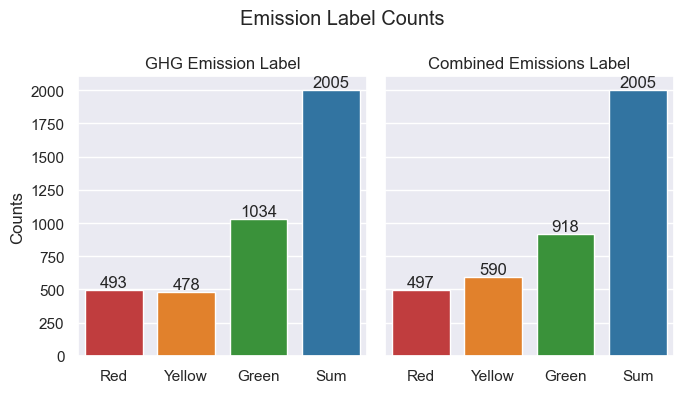

In [58]:
# THE BLUE BAR REPRESENTS THE SUM ROW WHICH IS THE TOTAL NUMBER OF RECIPES THAT HAVE BEEN ASSIGNED A LABEL
# EACH BAR REPRESENTS THE # OF RECIPES THAT WERE LABELLED WITH THAT SPECIFIC COLOUR

fig = create_visualizations(counts)
fig

In [59]:
final2.head()

,Category,Displayed Name,ProdId,Description,SalesGroup,Weight (g),GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,GHG Only Label,Combined Label
0,$1 OWN MUG ETHICAL BEAN COFFEE,NaN,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,386.0000,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Yellow,Green
1,ADD CUP,NaN,R-62976,ADD CUP,OK - GRAB & GO,1.0000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green,Green
2,ADD,Beef,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,85.0485,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red,Red
3,ADD,Chicken,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,85.0485,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red,Red
4,ADD,Crackers,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,6.0000,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Green,Yellow


In [60]:
final3 = final2.drop(columns=['Category', 'Displayed Name', 'Weight (g)', 'GHG Only Label'])

In [61]:
final3.head()

,ProdId,Description,SalesGroup,GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,Combined Label
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Green
1,R-62976,ADD CUP,OK - GRAB & GO,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Yellow


In [62]:
final3.rename(columns={'ProdId': 'Optimum Control ID', 'Description': 'OC Description'}, inplace=True)

In [63]:
final3.head()

,Optimum Control ID,OC Description,SalesGroup,GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,Combined Label
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Green
1,R-62976,ADD CUP,OK - GRAB & GO,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Yellow


In [64]:
final3['Red'] = final3['Combined Label'] == 'Red'
final3['Yellow'] = final3['Combined Label'] == 'Yellow'
final3['Green'] = final3['Combined Label'] == 'Green'

In [65]:
final3.head()

,Optimum Control ID,OC Description,SalesGroup,GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g,Combined Label,Red,Yellow,Green
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00,Green,False,False,True
1,R-62976,ADD CUP,OK - GRAB & GO,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Green,False,False,True
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64,Red,True,False,False
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44,Red,True,False,False
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49,Yellow,False,True,False


In [66]:
import pandas as pd


desired_column_order = [
    'Optimum Control ID', 'OC Description', 'SalesGroup', 'Combined Label', 'Red', 'Yellow', 'Green',
    'GHG Emission (g)', 'N lost (g)', 'Land Use (m^2)', 'Freshwater Withdrawals (L)', 
    'Stress-Weighted Water Use (L)', 'GHG Emission (g) / 100g', 'N lost (g) / 100g', 
    'Freshwater Withdrawals (L) / 100g', 'Stress-Weighted Water Use (L) / 100g', 
    'Land Use (m^2) / 100g'
]

# Create a new DataFrame with the desired column order
data_reordered = final3[desired_column_order]

# Print the reordered DataFrame
data_reordered.head()


,Optimum Control ID,OC Description,SalesGroup,Combined Label,Red,Yellow,Green,GHG Emission (g),N lost (g),Land Use (m^2),Freshwater Withdrawals (L),Stress-Weighted Water Use (L),GHG Emission (g) / 100g,N lost (g) / 100g,Freshwater Withdrawals (L) / 100g,Stress-Weighted Water Use (L) / 100g,Land Use (m^2) / 100g
0,R-67294,$1 OWN MUG ETHICAL BEAN COFFEE,BEVERAGE,Green,False,False,True,911.741955,0.743803,0.000000,4.29,571.66,236.20,0.19,1.11,148.10,0.00
1,R-62976,ADD CUP,OK - GRAB & GO,Green,False,False,True,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,R-31006,ADD|Beef,OK - CUSTOM KITCHEN,Red,True,False,False,3516.440796,28.023481,10.754383,142.64,5214.24,4134.63,32.95,167.72,6130.90,12.64
3,R-31131,ADD|Chicken,OK - CUSTOM KITCHEN,Red,True,False,False,468.387687,12.417476,1.225451,39.37,35.47,550.73,14.60,46.29,41.71,1.44
4,R-30154,ADD|Crackers,OK - CUSTOM KITCHEN,Yellow,False,True,False,9.135000,0.088800,0.029340,2.52,76.93,152.25,1.48,42.00,1282.17,0.49


In [67]:
data_reordered.to_csv("C:/Users/smvan/CFFS-S23/CFFS-22-23/data/final/2023_2024_CFFS_Outcomes/Labelled_Data_"+restaurant_name+"_for_nutrislice.csv",
                  index=False)